# **Importing libraries and data file**

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [243]:
data = pd.read_csv('Mall_Customers.csv',index_col='CustomerID')

In [244]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [245]:
data.rename(columns={'Genre':'Gender'},inplace=True)

In [246]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


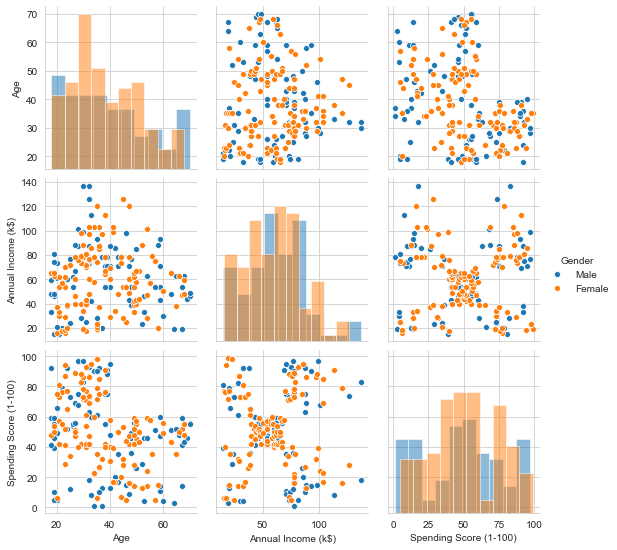

In [222]:
sns.pairplot(data,hue='Gender',diag_kind='hist',diag_kws={'alpha':0.5})

# **Data Pre-Processing**

**Selecting only 2 variables for K-Means Clustering** (for ease of representation in 2D plots)

In [247]:
data.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81


In [248]:
data.drop(['Gender','Age'],axis=1,inplace=True)

In [249]:
data.head(2)

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81


# Using the elbow method for choosing the optimal number of clusters

In [226]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [227]:
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=101)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

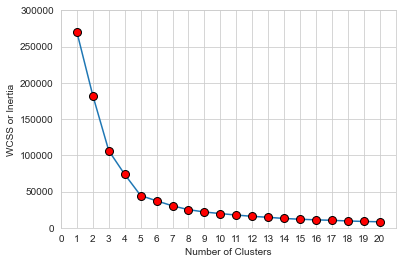

In [228]:
plt.plot(range(1,21),wcss,marker='o',markerfacecolor='red',markersize=8,markeredgecolor='black')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS or Inertia')
plt.xlim(0,21)
plt.ylim(0,300000)
plt.xticks(np.arange(0,21))
plt.show()

In [229]:
wcss

[269981.28000000014,
 182440.30762987016,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25044.96776401891,
 21797.08494464637,
 19643.655552199743,
 17586.63244734051,
 15816.841159461725,
 14469.732546290263,
 12891.627064602064,
 11811.9371020284,
 10974.920017745015,
 10326.282448348747,
 9438.088400729705,
 8741.060989252292,
 8307.562059509119]

**From the above ouput of the elbow method, we can say that significant amount of variability in clustering is captured through use of 5 clusters with a WCSS of less than 50000. Hence, we will be using n_clusters = 5 for our final model training**

In [250]:
kmeans_final = KMeans(n_clusters=5,init='k-means++',random_state=101)
kmeans_final.fit(data)

KMeans(n_clusters=5, random_state=101)

In [251]:
kmeans_final.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [252]:
data['cluster_labels'] = kmeans_final.labels_

In [258]:
data['cluster_labels'].unique()

array([3, 1, 0, 2, 4])

In [259]:
data['cluster_labels'].replace([0,1,2,3,4],[1,2,3,4,5],inplace=True)

In [260]:
data['cluster_labels'].unique()

array([4, 2, 1, 3, 5], dtype=int64)

# Visualising the cluster results

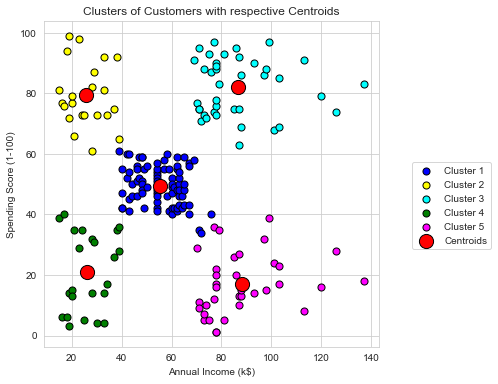

In [261]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=data[data['cluster_labels']==1],c='blue',
            edgecolors='black',s=50,label='Cluster 1')
plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=data[data['cluster_labels']==2],c='yellow',
            edgecolors='black',s=50,label='Cluster 2')
plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=data[data['cluster_labels']==3],c='cyan',
            edgecolors='black',s=50,label='Cluster 3')
plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=data[data['cluster_labels']==4],c='green',
            edgecolors='black',s=50,label='Cluster 4')
plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=data[data['cluster_labels']==5],c='magenta',
            edgecolors='black',s=50,label='Cluster 5')
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s = 200, 
            c='red', label = 'Centroids',edgecolors='black')
plt.legend(loc=(1.1,0.3))
plt.title('Clusters of Customers with respective Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [262]:
data['cluster_labels'].value_counts(normalize=True)*100

1    40.5
3    19.5
5    17.5
4    11.5
2    11.0
Name: cluster_labels, dtype: float64

**Thus, in the above final output we can easily identify 5 distinct clusters of customers**

- Majority of the customers lie in the first cluster which represents annual income in the range of 40k to 70k USD and spending score between 40 to 60
- However, we can also see that the highest potential customers lie in cluster 3 which has 19.5% of the current observations. This group has high annual income as well as high spending score
- A small proportion of individuals (11%) present in cluster 2 also have a high spending score in spite of low annual income

**Note:** This project was done as a follow-along of Udemy course - https://www.udemy.com/course/machinelearning/